In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlqueries_unc_preeclampsia import *
import os
import dotenv

### 1. load and massage the dataset

In [2]:
dotenv.load_dotenv()
connection_string = f"mssql+pymssql://@{os.getenv('HOSTNAME')}/{os.getenv('DATABASE')}"
engine = sqlalchemy.create_engine(connection_string)
sql_string = f'''
select
    *
from {os.getenv('DATABASE')}.{os.getenv('SCHEMA')}.rpt_preeclampsia
'''
dat = pd.read_sql(sql_string, con=engine)

### 2. take a look at the Nans

In [3]:
dat.isna().mean().sort_values(ascending=False)

med_lancets            1.000000
med_needle             1.000000
min_TEMPERATURE        0.575306
mean_PULSE             0.396067
max_PULSE              0.396067
median_PULSE           0.396067
min_BMI                0.247002
median_BMI             0.247002
max_BMI                0.247002
mean_BMI               0.247002
min_WEIGHT             0.243714
mean_WEIGHT            0.243714
max_WEIGHT             0.243714
median_WEIGHT          0.243714
mean_MAP               0.241522
max_pulse_pressure     0.241522
med_sbp_value          0.241522
max_dbp_value          0.241522
median_MAP             0.241522
mean_dbp_value         0.241522
med_dbp_value          0.241522
mean_sbp_value         0.241522
max_sbp_value          0.241522
max_MAP                0.241522
mean_pulse_pressure    0.241522
preg_mom_age_at_del    0.002772
cp_anypree_sf          0.000000
preg_deid              0.000000
chtn_any               0.000000
med_insulin            0.000000
mom_race_num           0.000000
med_gluc

In [4]:
# we don't have lancets or needle
dat = dat.drop(columns=['med_lancets', 'med_needle'])

# sbp and dbp are likely important, remove null for those two columns
dat = dat.dropna(subset=['mean_dbp_value', 'mean_sbp_value'])

dat.shape

(11764, 32)

In [5]:
dat.isna().mean().sort_values(ascending=False)

min_TEMPERATURE        0.440581
max_PULSE              0.204352
mean_PULSE             0.204352
median_PULSE           0.204352
mean_BMI               0.014196
max_BMI                0.014196
median_BMI             0.014196
min_BMI                0.014196
mean_WEIGHT            0.009946
min_WEIGHT             0.009946
median_WEIGHT          0.009946
max_WEIGHT             0.009946
preg_mom_age_at_del    0.002295
max_sbp_value          0.000000
preg_deid              0.000000
cp_anypree_sf          0.000000
max_pulse_pressure     0.000000
max_dbp_value          0.000000
chtn_any               0.000000
mean_sbp_value         0.000000
med_sbp_value          0.000000
med_dbp_value          0.000000
mean_dbp_value         0.000000
mean_pulse_pressure    0.000000
mom_race_num           0.000000
med_glucagon           0.000000
max_MAP                0.000000
med_insulin            0.000000
med_NIFEdipine         0.000000
mean_MAP               0.000000
median_MAP             0.000000
med_gluc

In [6]:
# drop BMI WEIGHT preg_mom_age_at_del
dat = dat.dropna(subset=['mean_BMI', 'max_BMI', 'median_BMI', 'min_BMI', 
                         'mean_WEIGHT', 'min_WEIGHT', 'median_WEIGHT', 'max_WEIGHT',
                         'preg_mom_age_at_del'])

dat.shape

(11566, 32)

In [7]:
dat.isna().mean().sort_values(ascending=False)

min_TEMPERATURE        0.444492
max_PULSE              0.206121
mean_PULSE             0.206121
median_PULSE           0.206121
preg_deid              0.000000
cp_anypree_sf          0.000000
chtn_any               0.000000
mean_sbp_value         0.000000
max_dbp_value          0.000000
max_WEIGHT             0.000000
median_WEIGHT          0.000000
mean_WEIGHT            0.000000
med_sbp_value          0.000000
med_dbp_value          0.000000
mean_dbp_value         0.000000
max_sbp_value          0.000000
mean_BMI               0.000000
max_BMI                0.000000
max_pulse_pressure     0.000000
min_WEIGHT             0.000000
min_BMI                0.000000
median_BMI             0.000000
mean_pulse_pressure    0.000000
med_NIFEdipine         0.000000
mom_race_num           0.000000
med_glucagon           0.000000
max_MAP                0.000000
med_insulin            0.000000
median_MAP             0.000000
preg_mom_age_at_del    0.000000
mean_MAP               0.000000
med_gluc

In [8]:
dat[['min_TEMPERATURE', 'mean_PULSE', 'max_PULSE', 'median_PULSE']].describe()

,min_TEMPERATURE,mean_PULSE,max_PULSE,median_PULSE
count,6425.000000,9182.000000,9182.000000,9182.000000
mean,97.962817,86.819350,95.696580,86.551786
std,0.995218,11.014829,14.485019,11.295181
min,68.000000,5.000000,5.000000,5.000000
25%,97.600000,79.350000,86.000000,79.000000
50%,98.000000,86.250000,95.000000,86.000000
75%,98.400000,93.666667,104.000000,93.500000
max,103.000000,170.000000,229.000000,170.000000


In [9]:
# fill nan for these 2 with avg value and mark them as nan
for col in ['min_TEMPERATURE', 'mean_PULSE', 'max_PULSE', 'median_PULSE']:
    dat[f'{col}_isna'] = np.where(dat[col].isna(), 1, 0)
    dat[col] = dat[col].fillna(dat[col].mean())

dat[['min_TEMPERATURE', 'mean_PULSE', 'max_PULSE', 'median_PULSE']].describe()

,min_TEMPERATURE,mean_PULSE,max_PULSE,median_PULSE
count,11566.000000,11566.000000,11566.000000,11566.000000
mean,97.962817,86.819350,95.696580,86.551786
std,0.741734,9.814088,12.905988,10.063878
min,68.000000,5.000000,5.000000,5.000000
25%,97.900000,81.333333,88.250000,81.000000
50%,97.962817,86.819350,95.696580,86.551786
75%,98.100000,91.500000,101.000000,91.000000
max,103.000000,170.000000,229.000000,170.000000


In [10]:
dat.shape

(11566, 36)

In [11]:
dat.isna().sum().sum()

np.int64(0)

### 3. build the model

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, make_scorer, roc_auc_score

specificity = make_scorer(recall_score, pos_label=0)

In [13]:
# set up the model
# the param range should be okay, but check the best_params from get_many_acus to make sure
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200),
                   param_grid={'min_samples_split': [10,15,20,25,30,50,70,100,120,150,170,200]},
                   verbose=3,
                   scoring={'f1':'f1',
                            'roc_auc':'roc_auc',
                            'sensitivity':'recall',
                            'precision':'precision',
                            'specificity': specificity},
                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                   refit='roc_auc')

In [14]:
dat.head()

,preg_deid,cp_anypree_sf,chtn_any,mean_sbp_value,med_sbp_value,med_dbp_value,mean_dbp_value,max_sbp_value,max_dbp_value,max_WEIGHT,...,median_MAP,median_PULSE,max_PULSE,mean_PULSE,med_glucose,min_TEMPERATURE,min_TEMPERATURE_isna,mean_PULSE_isna,max_PULSE_isna,median_PULSE_isna
3831,60037887,1,0,130.000000,132.0,74.0,74.500000,137.0,81.0,218.600006,...,92.000000,100.5,113.0,101.25,0,99.4,0,0,0,0
3832,53788230,0,1,142.000000,142.0,71.0,71.000000,142.0,71.0,206.500000,...,94.666667,99.0,99.0,99.00,0,98.7,0,0,0,0
3833,98783102,0,1,132.000000,132.0,72.0,72.000000,132.0,72.0,260.600006,...,83.000000,86.0,86.0,86.00,0,97.9,0,0,0,0
3834,92522985,0,1,131.333333,131.5,77.5,76.166667,152.0,90.0,222.500000,...,77.000000,101.0,121.0,100.00,0,98.2,0,0,0,0
3835,39586952,0,0,112.400000,112.0,70.0,70.200000,118.0,79.0,128.300003,...,84.000000,92.0,92.0,92.00,0,99.2,0,0,0,0


In [15]:
X = dat.drop(columns=['preg_deid', 'cp_anypree_sf'])
y = dat['cp_anypree_sf']

clf.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END min_samples_split=10; f1: (test=0.310) precision: (test=0.592) roc_auc: (test=0.726) sensitivity: (test=0.210) specificity: (test=0.974) total time=   2.9s
[CV 2/5] END min_samples_split=10; f1: (test=0.249) precision: (test=0.577) roc_auc: (test=0.714) sensitivity: (test=0.159) specificity: (test=0.979) total time=   2.9s
[CV 3/5] END min_samples_split=10; f1: (test=0.240) precision: (test=0.467) roc_auc: (test=0.671) sensitivity: (test=0.161) specificity: (test=0.967) total time=   2.9s
[CV 4/5] END min_samples_split=10; f1: (test=0.298) precision: (test=0.573) roc_auc: (test=0.712) sensitivity: (test=0.201) specificity: (test=0.973) total time=   2.9s
[CV 5/5] END min_samples_split=10; f1: (test=0.239) precision: (test=0.460) roc_auc: (test=0.725) sensitivity: (test=0.161) specificity: (test=0.966) total time=   2.9s
[CV 1/5] END min_samples_split=15; f1: (test=0.355) precision: (test=0.544) roc_auc: (test=0.7

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=200,
                                              random_state=42),
             param_grid={'min_samples_split': [10, 15, 20, 25, 30, 50, 70, 100,
                                               120, 150, 170, 200]},
             refit='roc_auc',
             scoring={'f1': 'f1', 'precision': 'precision',
                      'roc_auc': 'roc_auc', 'sensitivity': 'recall',
                      'specificity': make_scorer(recall_score, response_method='predict', pos_label=0)},
             verbose=3)

In [16]:
clf.best_params_, clf.best_score_

({'min_samples_split': 70}, np.float64(0.7125968534482772))

In [17]:
y.mean()

np.float64(0.1526024554729379)

### 4. initial look at feature importance

In [18]:
import shap

c:\Users\zhma\Projects\ammi\analysis\zhma_ml_analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
explainer = shap.TreeExplainer(clf.best_estimator_, data=X,
                               model_output='probability', feature_perturbation='interventional')
shap_values = explainer(X, check_additivity=True)
shap_values.values = shap_values.values[:,:,1]

100%|===================| 23122/23132 [09:54<00:00]        

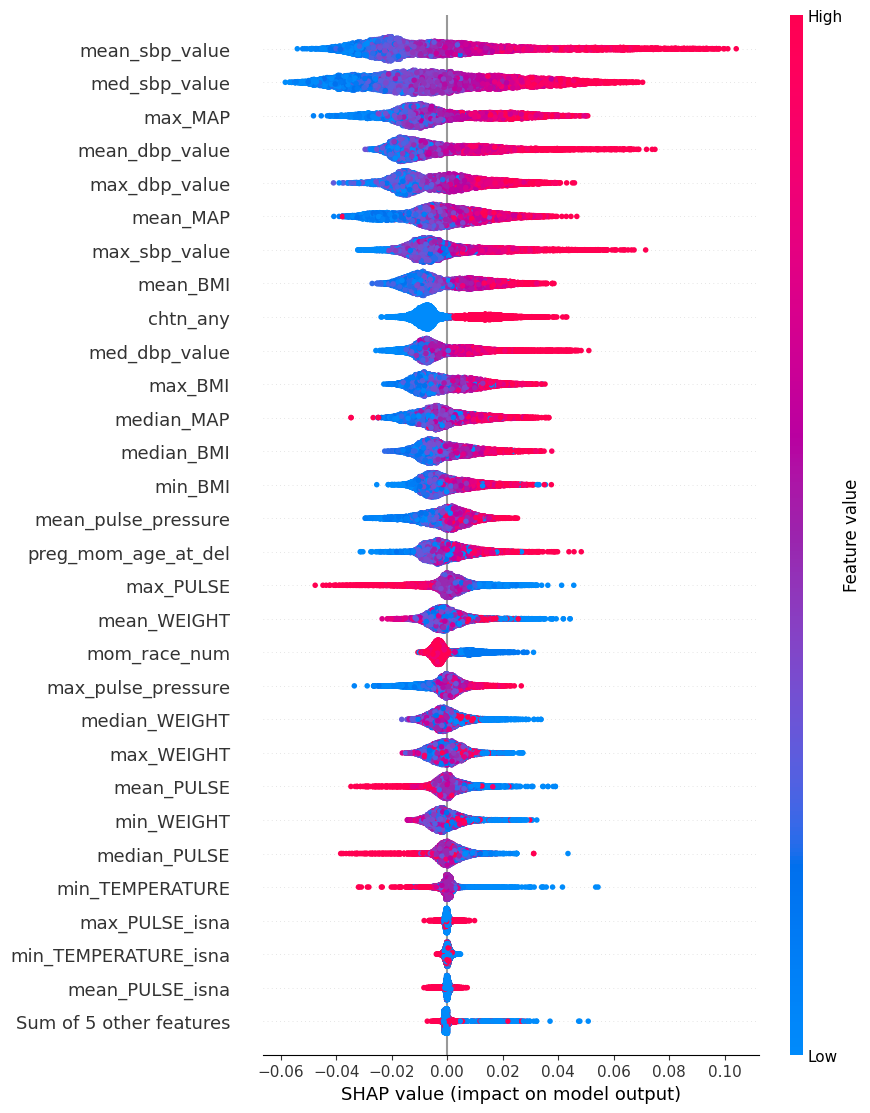

In [20]:
shap.plots.beeswarm(shap_values, max_display=30)